In [2]:
#Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from sklearn.metrics import r2_score
import glob

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

In [4]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
train.head()

,stock_id,time_id,target
0,0,5,0.004136
1,0,11,0.001445
2,0,16,0.002168
3,0,31,0.002195
4,0,62,0.001747


In [6]:
test.head()

,stock_id,time_id,row_id
0,0,4,0-4
1,0,32,0-32
2,0,34,0-34


Mean : 0.0038804095369522435


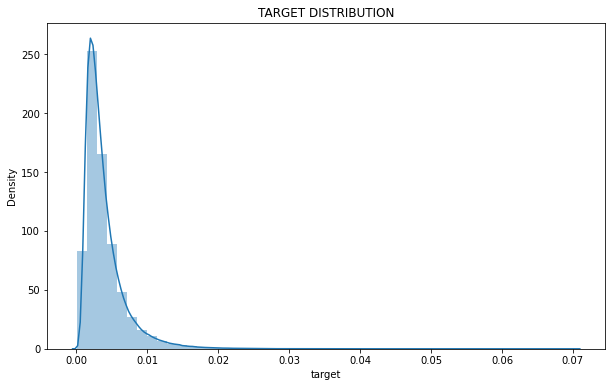

In [7]:
#Target Distribution
mean= np.mean(train['target'])
print(f'Mean : {mean}')

plt.figure(figsize= (10, 6))
sns.distplot(train['target'], bins=50)
plt.title("TARGET DISTRIBUTION")
plt.show()

In [8]:
#Checking values greater than 0.02
print(f"Target count greater than 0.02 : {train['target'][train['target'] >= 0.02].count()}")
print(f"Percentage of total: {(train['target'][train['target'] >= 0.02].count() / train.shape[0]) * 100} %")

Target count greater than 0.02 : 1300
Percentage of total: 0.3030783434204023 %


In [9]:
#Finding count of distinct elements in dataframe in each column 
print(f"Number of shares: {train.shape[0]}")
for col in train.columns:
    print(f" {col}: {len(train[col].unique())}")

Number of shares: 428932
 stock_id: 112
 time_id: 3830
 target: 414287


In [10]:
#AS THE OUTPUT SHOWS THERE ARE 112 DIFFERENT STOCK IDS, 3830 TIME IDS & 414287 TARGET

No handles with labels found to put in legend.


Mean: 0.0038805243039130312
Max value: 14.860998424142858


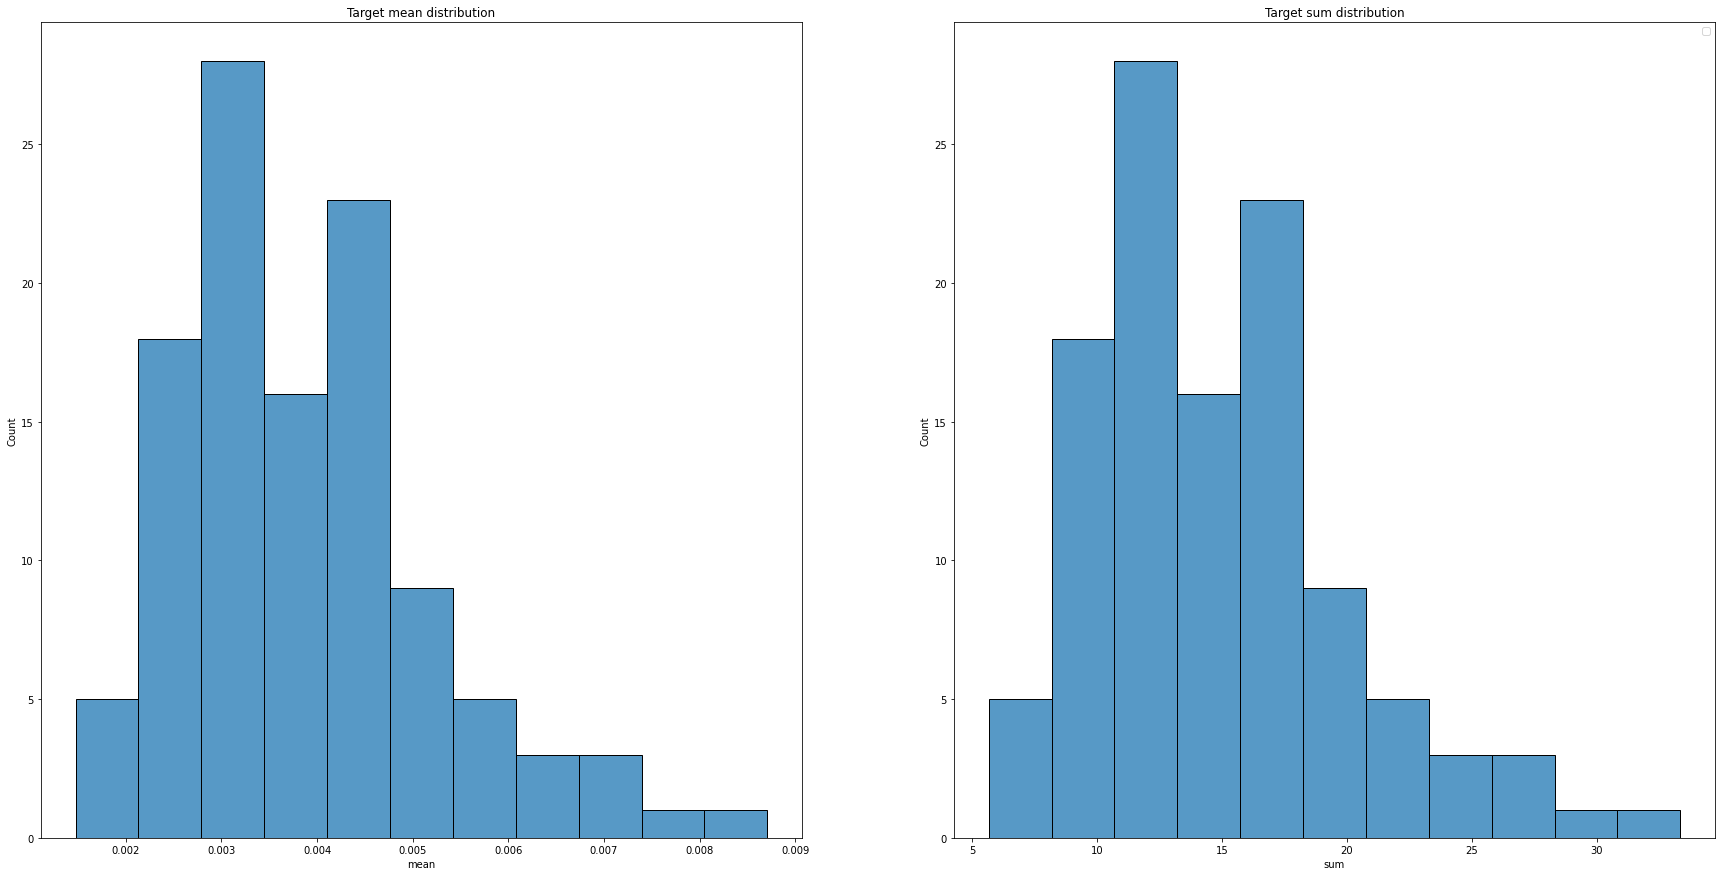

In [15]:
stock = train.groupby('stock_id')['target'].agg(['mean', 'sum']).reset_index()
print(f"Mean: {stock['mean'].mean()}")
print(f"Max value: {stock['sum'].mean()}")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 15))
sns.histplot(x=stock['mean'], ax=ax1)
sns.histplot(x=stock['sum'], ax=ax2)
ax1.set_title('Target mean distribution', size=12)
ax2.set_title('Target sum distribution', size=12)
plt.legend()
plt.show()

In [16]:
#The mean value is 0.003 that is close to 0
#Max value is on 14.8

In [20]:
book_train = pd.read_parquet("book_train.parquet/stock_id=0")
book_test = pd.read_parquet("book_test.parquet/stock_id=0")

trade_train = pd.read_parquet("trade_train.parquet/stock_id=0")
trade_test = pd.read_parquet("trade_test.parquet/stock_id=0")

book_train.head()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,5,0,1.001422,1.002301,1.00137,1.002353,3,226,2,100
1,5,1,1.001422,1.002301,1.00137,1.002353,3,100,2,100
2,5,5,1.001422,1.002301,1.00137,1.002405,3,100,2,100
3,5,6,1.001422,1.002301,1.00137,1.002405,3,126,2,100
4,5,7,1.001422,1.002301,1.00137,1.002405,3,126,2,100


In [21]:
df_book = book_train[book_train['time_id'] == 5]
df_book.head()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,5,0,1.001422,1.002301,1.00137,1.002353,3,226,2,100
1,5,1,1.001422,1.002301,1.00137,1.002353,3,100,2,100
2,5,5,1.001422,1.002301,1.00137,1.002405,3,100,2,100
3,5,6,1.001422,1.002301,1.00137,1.002405,3,126,2,100
4,5,7,1.001422,1.002301,1.00137,1.002405,3,126,2,100


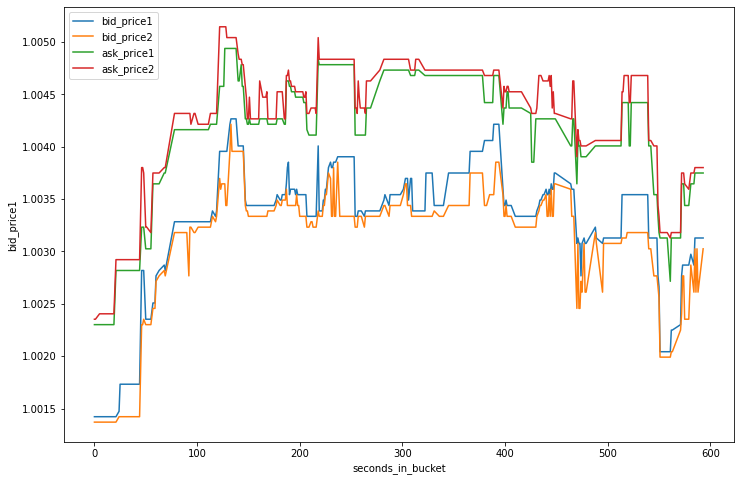

In [28]:
plt.figure(figsize=(12, 8))
for col in ['bid_price1', 'bid_price2', 'ask_price1', 'ask_price2']:
    sns.lineplot(x='seconds_in_bucket', y=col, data=df_book, label=col)
plt.legend()
plt.show()

In [29]:
df_book['wap'] = (df_book['bid_price1'] * df_book['ask_size1']+df_book['ask_price1'] * df_book['bid_size1'])  / (df_book['bid_size1'] + df_book['ask_size1'])

def log_return(list_stock_prices):
    return np.log(list_stock_prices).diff()

df_book.loc[:,'log_return'] = log_return(df_book['wap'])
df_book = df_book[~df_book['log_return'].isnull()]

In [30]:
def realized_volatility(series_log_return):
    return np.sqrt(np.sum(series_log_return**2))
realized_vol = realized_volatility(df_book['log_return'])
print(f'Realized volatility for stock_id 0 on time_id 5 is {realized_vol}')

Realized volatility for stock_id 0 on time_id 5 is 0.004499364172786558
